In [1]:
#Se importan librerías esenciales
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from IPython.display import display

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
#Montamos nuestro Google Drive con el set de datos
from google.colab import drive
drive.mount('/content/gdrive') #Se da click en el URL que aparece y se ingresa la clave de autorización

Mounted at /content/gdrive


In [5]:
os.chdir('/content/gdrive/My Drive/Proyecto_Final_MNO/data')
print("Directorio del Proyecto Final" , os.getcwd())

Directorio del Proyecto Final /content/gdrive/My Drive/Proyecto_Final_MNO/data


In [19]:
#Se obtiene una vista inicial se los datos
nutricion = pd.read_csv('nndb_flat.csv')
nutricion.head(10)

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,VitE_mg,Folate_mcg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717,0.85,81.11,0.06,0.06,0.0,684,0.003,0.17,0.0,2.32,3,0.042,0.034,0.005,24,0.000,0.02,2,0.000,24,1.0,0.09,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717,0.85,81.11,0.06,0.06,0.0,684,0.003,0.13,0.0,2.32,3,0.042,0.034,0.005,24,0.016,0.16,2,0.004,23,1.0,0.05,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876,0.28,99.48,0.00,0.00,0.0,840,0.001,0.01,0.0,2.80,0,0.003,0.005,0.001,4,0.001,0.00,0,0.000,3,0.0,0.01,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353,21.40,28.74,2.34,0.50,0.0,198,0.166,1.22,0.0,0.25,36,1.016,0.382,0.029,528,0.040,0.31,23,0.009,387,14.5,2.66,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371,23.24,29.68,2.79,0.51,0.0,292,0.065,1.26,0.0,0.26,20,0.118,0.351,0.014,674,0.024,0.43,24,0.012,451,14.5,2.60,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
5,1006,Dairy and Egg Products,"CHEESE,BRIE","Cheese, brie",NaN,NaN,NaN,334,20.75,27.68,0.45,0.45,0.0,174,0.235,1.65,0.0,0.24,65,0.380,0.520,0.070,184,0.019,0.50,20,0.034,188,14.5,2.38,0.193333,0.138235,0.687500,0.0,0.016000,0.1625,0.023750,0.400000,0.058333,0.153333,0.000021,0.047619,0.268571,0.263636,0.216364
6,1007,Dairy and Egg Products,"CHEESE,CAMEMBERT","Cheese, camembert",NaN,NaN,NaN,300,19.80,24.26,0.46,0.46,0.0,241,0.227,1.30,0.0,0.21,62,0.630,0.488,0.028,388,0.021,0.33,20,0.038,347,14.5,2.38,0.267778,0.133529,0.541667,0.0,0.014000,0.1550,0.039375,0.375385,0.023333,0.323333,0.000023,0.047619,0.495714,0.263636,0.216364
7,1008,Dairy and Egg Products,"CHEESE,CARAWAY","Cheese, caraway",NaN,NaN,NaN,376,25.18,29.20,3.06,0.00,0.0,271,0.074,0.27,0.0,0.00,18,0.180,0.450,0.031,673,0.024,0.64,22,0.021,490,14.5,2.94,0.301111,0.043529,0.112500,0.0,0.000000,0.0450,0.011250,0.346154,0.025833,0.560833,0.000027,0.052381,0.700000,0.263636,0.267273
8,1009,Dairy and Egg Products,"CHEESE,CHEDDAR","Cheese, cheddar",NaN,NaN,NaN,406,24.04,33.82,1.33,0.28,0.0,263,0.049,0.88,0.0,0.78,26,0.039,0.434,0.027,675,0.056,0.16,27,0.033,473,28.3,3.43,0.292222,0.028824,0.366667,0.0,0.052000,0.0650,0.002437,0.333846,0.022500,0.562500,0.000062,0.064286,0.675714,0.514545,0.311818
9,1010,Dairy and Egg Products,"CHEESE,CHESHIRE","Cheese, cheshire",NaN,NaN,NaN,387,23.37,30.60,4.78,0.00,0.0,233,0.074,0.83,0.0,0.00,18,0.080,0.293,0.046,643,0.042,0.21,21,0.012,464,14.5,2.79,0.258889,0.043529,0.345833,0.0,0.000000,0.0450,0.005000,0.225385,0.038333,0.535833,0.000047,0.050000,0.662857,0.263636,0.253636


In [20]:
nutricion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8618 non-null   int64  
 1   FoodGroup         8618 non-null   object 
 2   ShortDescrip      8618 non-null   object 
 3   Descrip           8618 non-null   object 
 4   CommonName        1063 non-null   object 
 5   MfgName           1560 non-null   object 
 6   ScientificName    732 non-null    object 
 7   Energy_kcal       8618 non-null   int64  
 8   Protein_g         8618 non-null   float64
 9   Fat_g             8618 non-null   float64
 10  Carb_g            8618 non-null   float64
 11  Sugar_g           8618 non-null   float64
 12  Fiber_g           8618 non-null   float64
 13  VitA_mcg          8618 non-null   int64  
 14  VitB6_mg          8618 non-null   float64
 15  VitB12_mcg        8618 non-null   float64
 16  VitC_mg           8618 non-null   float64


In [0]:
#nutricion = nutricion.drop(columns=['ID','FoodGroup','ShortDescrip','Descrip','CommonName','MfgName','ScientificName'])

In [49]:
#Vista de los valores únicos del set de cuestionarios, al ser 154 preguntas no dejaremos esta visualizacion dentro del Github

for col in list(nutricion):
    print(col)
    print(nutricion[col].unique())

ID
[ 1001  1002  1003 ... 90480 90560 93600]
FoodGroup
['Dairy and Egg Products' 'Spices and Herbs' 'Baby Foods' 'Fats and Oils'
 'Poultry Products' 'Soups, Sauces, and Gravies'
 'Sausages and Luncheon Meats' 'Breakfast Cereals' 'Snacks'
 'Fruits and Fruit Juices' 'Pork Products'
 'Vegetables and Vegetable Products' 'Nut and Seed Products'
 'Beef Products' 'Beverages' 'Finfish and Shellfish Products'
 'Legumes and Legume Products' 'Lamb, Veal, and Game Products'
 'Baked Products' 'Sweets' 'Cereal Grains and Pasta' 'Fast Foods'
 'Meals, Entrees, and Side Dishes' 'American Indian/Alaska Native Foods'
 'Restaurant Foods']
ShortDescrip
['BUTTER,WITH SALT' 'BUTTER,WHIPPED,WITH SALT' 'BUTTER OIL,ANHYDROUS' ...
 'SYRUP,CANE' 'SNAIL,RAW' 'TURTLE,GREEN,RAW']
Descrip
['Butter, salted' 'Butter, whipped, with salt' 'Butter oil, anhydrous' ...
 'Syrup, Cane' 'Mollusks, snail, raw' 'Turtle, green, raw']
CommonName
[nan 'Cassia' 'Chinese parsley, cilantro' 'mint'
 'low erucic acid rapeseed oil' 'lite

In [21]:
nutricion.columns

Index(['ID', 'FoodGroup', 'ShortDescrip', 'Descrip', 'CommonName', 'MfgName',
       'ScientificName', 'Energy_kcal', 'Protein_g', 'Fat_g', 'Carb_g',
       'Sugar_g', 'Fiber_g', 'VitA_mcg', 'VitB6_mg', 'VitB12_mcg', 'VitC_mg',
       'VitE_mg', 'Folate_mcg', 'Niacin_mg', 'Riboflavin_mg', 'Thiamin_mg',
       'Calcium_mg', 'Copper_mcg', 'Iron_mg', 'Magnesium_mg', 'Manganese_mg',
       'Phosphorus_mg', 'Selenium_mcg', 'Zinc_mg', 'VitA_USRDA', 'VitB6_USRDA',
       'VitB12_USRDA', 'VitC_USRDA', 'VitE_USRDA', 'Folate_USRDA',
       'Niacin_USRDA', 'Riboflavin_USRDA', 'Thiamin_USRDA', 'Calcium_USRDA',
       'Copper_USRDA', 'Magnesium_USRDA', 'Phosphorus_USRDA', 'Selenium_USRDA',
       'Zinc_USRDA'],
      dtype='object')

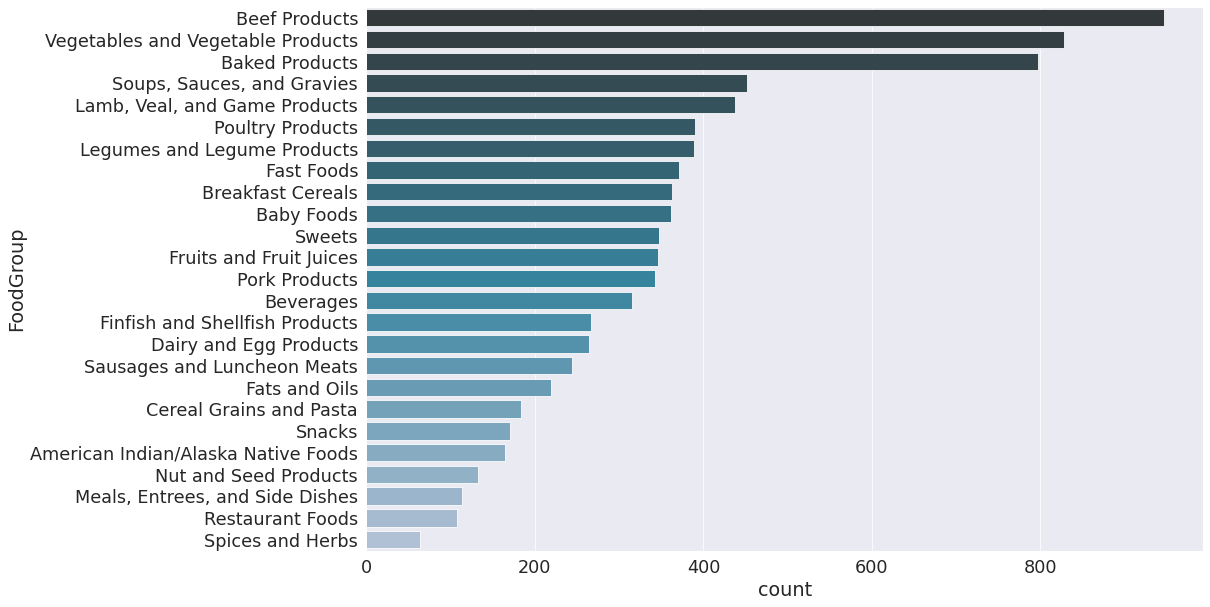

In [22]:
sns.set(style="darkgrid")
sns.set_context("paper", font_scale=2)     
plt.figure(figsize=(15, 10))
ax = sns.countplot(y="FoodGroup", data=nutricion,order = nutricion['FoodGroup'].value_counts().index, palette="PuBuGn_d")

<Figure size 432x288 with 0 Axes>

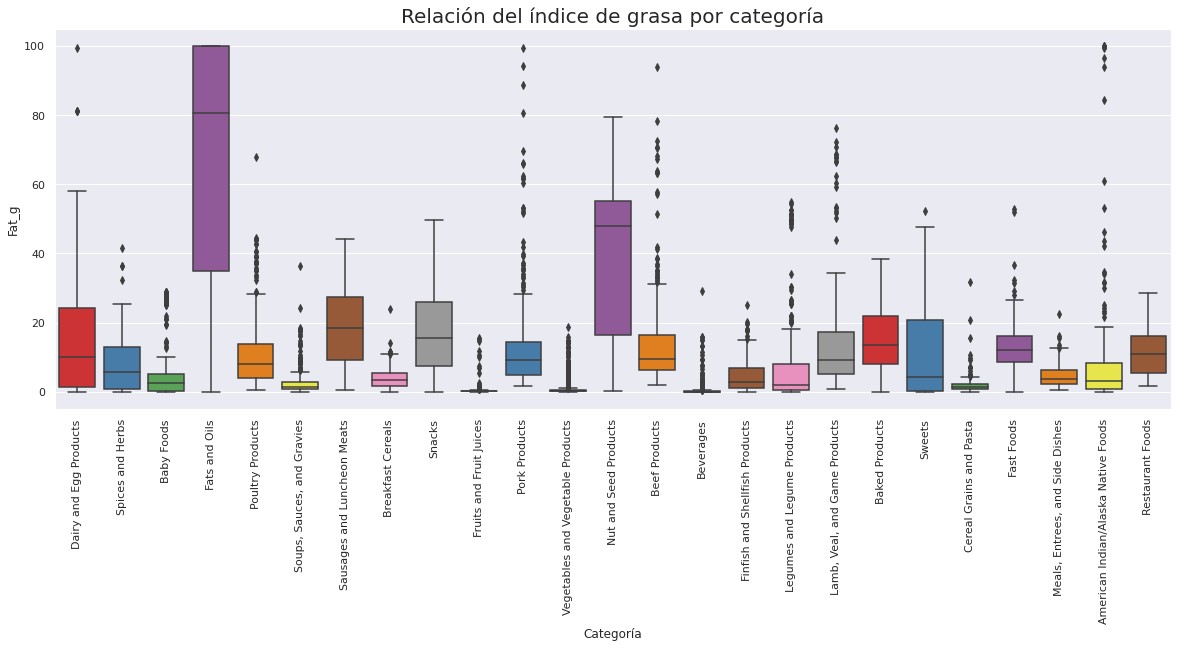

In [61]:
#Análisis Categorical to Quantitative relationship

sns.set(style="darkgrid")
fig=plt.figure()
plt.figure(figsize=(20,7))
chart1=sns.boxplot(nutricion.FoodGroup, nutricion.Fat_g, palette='Set1' )
chart1.set_xticklabels(chart1.get_xticklabels(),rotation=90)
chart1.set_xlabel('Categoría')
plt.title("Relación del índice de grasa por categoría", fontsize=20)
fig.show()

<Figure size 432x288 with 0 Axes>

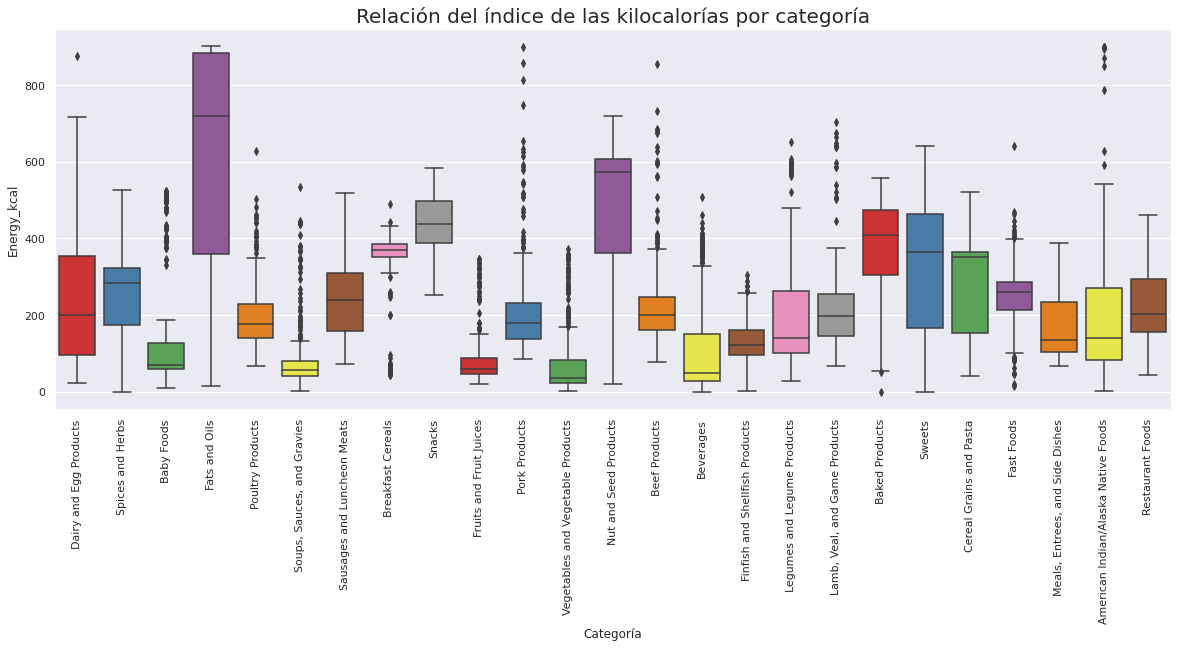

In [63]:
#Análisis Categorical to Quantitative relationship

sns.set(style="darkgrid")
fig=plt.figure()
plt.figure(figsize=(20,7))
chart1=sns.boxplot(nutricion.FoodGroup, nutricion.Energy_kcal, palette='Set1' )
chart1.set_xticklabels(chart1.get_xticklabels(),rotation=90)
chart1.set_xlabel('Categoría')
plt.title("Relación del índice de las kilocalorías por categoría", fontsize=20)
fig.show()

<Figure size 432x288 with 0 Axes>

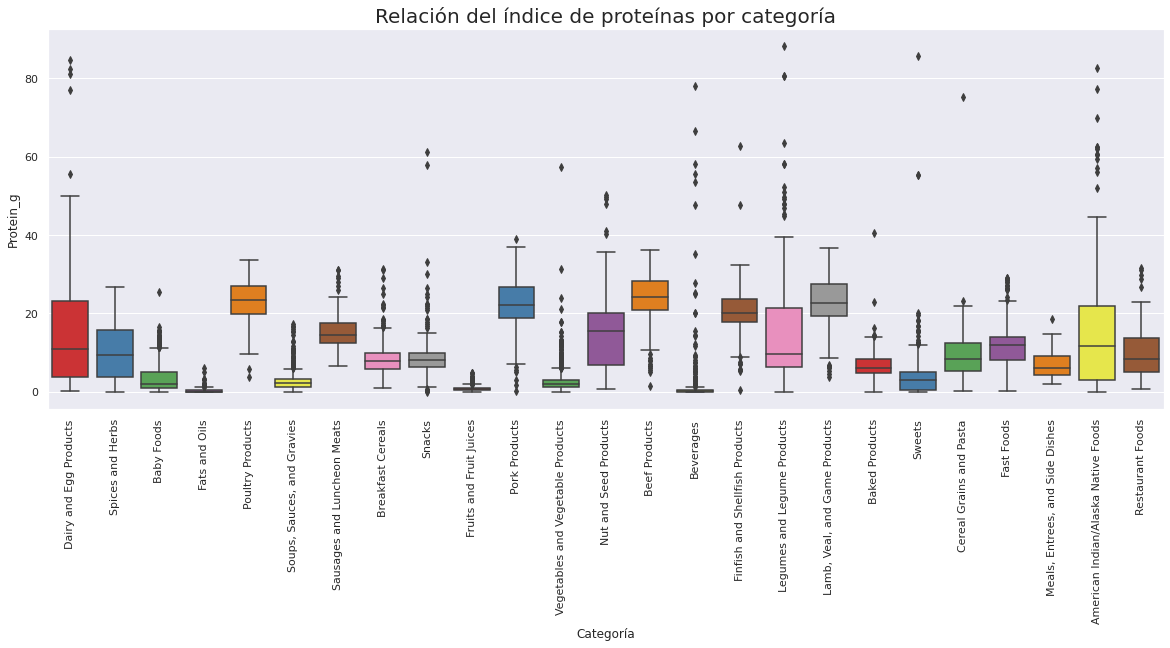

In [64]:
#Análisis Categorical to Quantitative relationship

sns.set(style="darkgrid")
fig=plt.figure()
plt.figure(figsize=(20,7))
chart1=sns.boxplot(nutricion.FoodGroup, nutricion.Protein_g , palette='Set1' )
chart1.set_xticklabels(chart1.get_xticklabels(),rotation=90)
chart1.set_xlabel('Categoría')
plt.title("Relación del índice de proteínas por categoría", fontsize=20)
fig.show()

<Figure size 432x288 with 0 Axes>

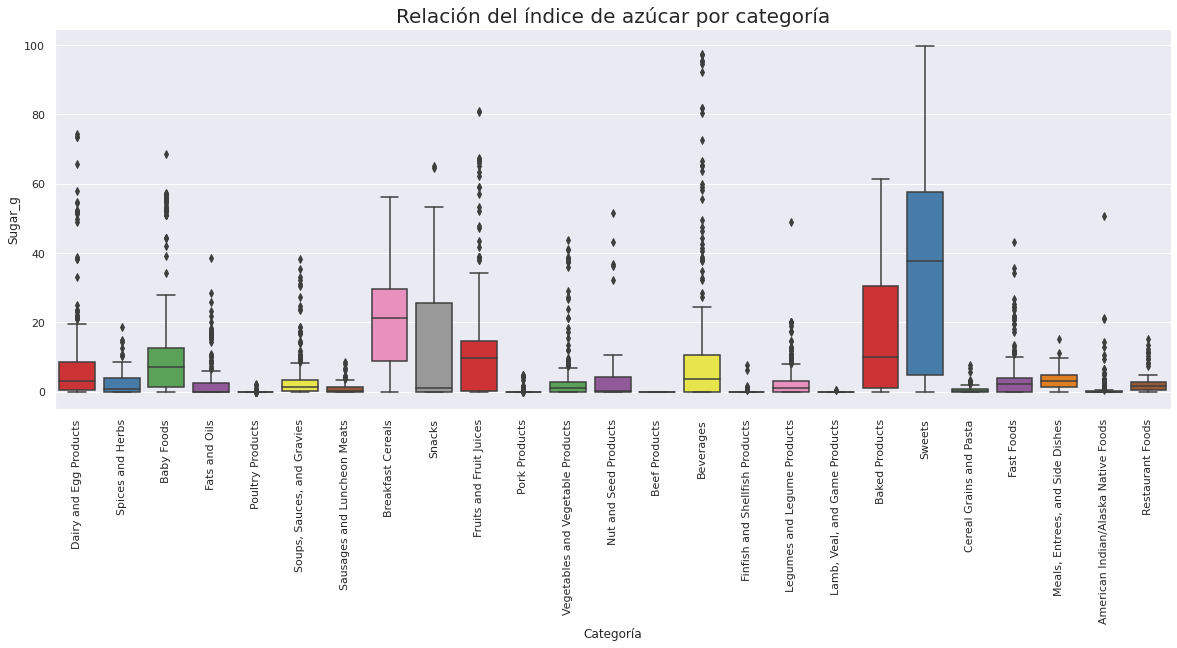

In [67]:
#Análisis Categorical to Quantitative relationship

sns.set(style="darkgrid")
fig=plt.figure()
plt.figure(figsize=(20,7))
chart1=sns.boxplot(nutricion.FoodGroup, nutricion.Sugar_g, palette='Set1' )
chart1.set_xticklabels(chart1.get_xticklabels(),rotation=90)
chart1.set_xlabel('Categoría')
plt.title("Relación del índice de azúcar por categoría", fontsize=20)
fig.show()

<Figure size 432x288 with 0 Axes>

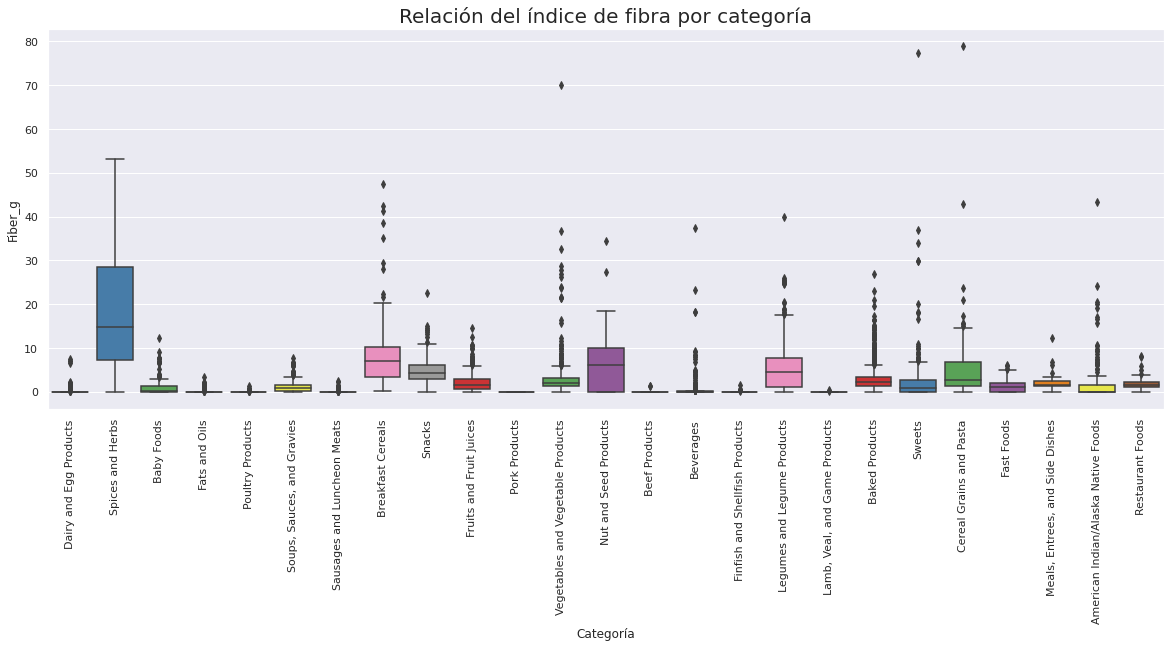

In [68]:
#Análisis Categorical to Quantitative relationship

sns.set(style="darkgrid")
fig=plt.figure()
plt.figure(figsize=(20,7))
chart1=sns.boxplot(nutricion.FoodGroup, nutricion.Fiber_g , palette='Set1' )
chart1.set_xticklabels(chart1.get_xticklabels(),rotation=90)
chart1.set_xlabel('Categoría')
plt.title("Relación del índice de fibra por categoría", fontsize=20)
fig.show()